## This is the face mask detector.

The following code utilizes Faster R-CNN in order to perform object detection and detec face masks on people in a picture.

### Store image's directory into a list¶

In [5]:
#retrieve image imformation
import os
image_directories = []
for dirname, _, filenames in os.walk('archive/images/'):
    for filename in filenames:
        image_directories.append(os.path.join(dirname, filename))

### Create Dataframe based on image's found in XML

In [6]:
import xml.etree.ElementTree as et
import re
import pandas as pd
import matplotlib.pyplot as plt

dic = {"image": [],"Dimensions": []}
for i in range(1,116):
	dic[f'Object {i}']=[]
print("Generating data in CSV format....")

img_elem = []
img_count = []

for file in os.listdir("archive/annotations"):
    row = []
    xml = et.parse("archive/annotations/"+file) 
    root = xml.getroot()
    
    img = root[1].text
    row.append(img)
    
    num_img = int(img[12:-4])
    img_count.append(num_img)
    
    h,w = root[2][0].text,root[2][1].text
    count = 0
    row.append([h,w])
    temp_img = []
    for i in range(4,len(root)):
        temp = []
        if root[i][0].text != "mask_weared_incorrect":
            
            temp.append(root[i][0].text)
            count +=1
    #         print(root[i][0].text)
            temp_img.append(root[i][0].text) 
            for point in root[i][5]:
                temp.append(point.text)
            row.append(temp)
#     img_elem.append(temp_img)
    img_elem.append(count)
    
    for i in range(len(row),119):
        row.append(0)
    for i,each in enumerate(dic):
        dic[each].append(row[i])
#Main data
df = pd.DataFrame(dic)
#bounding box information for understanding data
df2 = pd.DataFrame(img_elem)

Generating data in CSV format....


In [7]:
df

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 106,Object 107,Object 108,Object 109,Object 110,Object 111,Object 112,Object 113,Object 114,Object 115
0,maksssksksss299.png,"[301, 400]","[without_mask, 62, 194, 160, 320]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss528.png,"[301, 400]","[without_mask, 43, 169, 149, 308]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,maksssksksss272.png,"[275, 400]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss514.png,"[400, 267]","[with_mask, 28, 78, 43, 99]","[with_mask, 160, 66, 176, 83]","[with_mask, 174, 33, 186, 52]","[with_mask, 202, 40, 216, 59]","[without_mask, 237, 41, 248, 58]","[with_mask, 298, 38, 311, 54]","[with_mask, 333, 51, 346, 70]","[with_mask, 375, 47, 386, 63]",...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss500.png,"[301, 400]","[with_mask, 113, 230, 216, 368]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,maksssksksss266.png,"[301, 400]","[with_mask, 74, 205, 180, 330]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,maksssksksss716.png,"[301, 400]","[without_mask, 101, 174, 209, 299]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,maksssksksss702.png,"[600, 317]","[with_mask, 9, 170, 60, 229]","[with_mask, 165, 90, 202, 124]","[with_mask, 175, 175, 244, 260]","[with_mask, 303, 127, 360, 191]","[with_mask, 379, 63, 408, 98]","[with_mask, 433, 61, 471, 105]","[with_mask, 477, 78, 536, 133]","[with_mask, 569, 37, 592, 67]",...,0,0,0,0,0,0,0,0,0,0
8,maksssksksss845.png,"[301, 400]","[with_mask, 101, 197, 180, 306]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,maksssksksss689.png,"[560, 315]","[with_mask, 293, 153, 361, 212]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Cleaning Data

#### Remove pictures with "mask_weared_incorrect"

In [8]:
#Removes any pictures that formerly only had the "mask_weared_incorrect" label
for i in df.index.values:
    if isinstance(df["Object 1"][i], int):
        df = df.drop(i)

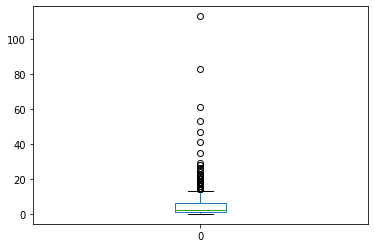

In [9]:
df2.plot.box()

#### Remove any images with greater than 40 bounding boxes

In [10]:
#Removes any images containing 40 or more bounding boxes
seriesObj = df2.apply(lambda x: True if x[0] < 40 else False, axis=1)
# print(type(seriesObj))
# print(len(df))

index = seriesObj[seriesObj == False].index.values
# print(list(index))
df = df.drop(index=list(index))
df2 = df2.drop(index=list(index))
# print(len(df))

#Removes extra columns
for i in range (40, 116):
    col_name = "Object "+ str(i)
    df.pop(col_name)


##### Frequency of Bounding Boxes

<AxesSubplot:ylabel='Frequency'>

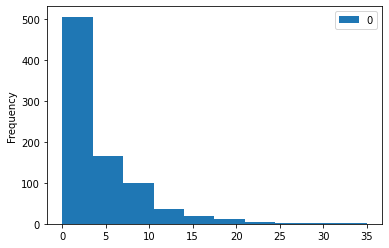

In [154]:
df2.plot.hist()

### Reformat DF to Bounding Box entry DF

In [23]:
bb_dict = {"Image": [], "ClassName": [], "XMin": [], "XMax": [], "YMin": [], "YMax": []}

for row in df.index.values:
    j = 0
    for col in df.columns:
        if (j < 2):
            j += 1
            continue
        if (df[col][row] == 0):
            break
        x, y = df["Dimensions"][row]
        x = int(x)
        y = int(y)
        bb_dict["Image"].append(df["image"][row])
        bb_dict["ClassName"].append(df[col][row][0])
        x1 = int(df[col][row][1])
        x2 = int(df[col][row][3])
        y1 = int(df[col][row][2])
        y2 = int(df[col][row][4])
        
        
        bb_dict["XMin"].append(x1 / x)
        bb_dict["XMax"].append(x2 / x)
        bb_dict["YMin"].append(y1 / y)
        bb_dict["YMax"].append(y2 / y)

bb_df = pd.DataFrame(bb_dict)

In [24]:
bb_df

,Image,ClassName,XMin,XMax,YMin,YMax
0,maksssksksss299.png,without_mask,0.205980,0.531561,0.485000,0.800000
1,maksssksksss528.png,without_mask,0.142857,0.495017,0.422500,0.770000
2,maksssksksss514.png,with_mask,0.070000,0.107500,0.292135,0.370787
3,maksssksksss514.png,with_mask,0.400000,0.440000,0.247191,0.310861
4,maksssksksss514.png,with_mask,0.435000,0.465000,0.123596,0.194757
5,maksssksksss514.png,with_mask,0.505000,0.540000,0.149813,0.220974
6,maksssksksss514.png,without_mask,0.592500,0.620000,0.153558,0.217228
7,maksssksksss514.png,with_mask,0.745000,0.777500,0.142322,0.202247
8,maksssksksss514.png,with_mask,0.832500,0.865000,0.191011,0.262172
9,maksssksksss514.png,with_mask,0.937500,0.965000,0.176030,0.235955


In [26]:
bb_df.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [20]:
from sklearn.model_selection import train_test_split

# train, test = train_test_split(bb_df, test_size=0.2, shuffle=True)
# train, test = train_test_split(df, test_size=0.2)
train_df = bb_df.sample(frac=0.8,random_state=200) #random state is a seed value
test_df = bb_df.drop(train_df.index)

train_df.head()





,Image,XMin,XMax,YMin,YMax,ClassName
1346,maksssksksss570.png,0.5825,0.6525,0.473684,0.582707,with_mask
1154,maksssksksss175.png,0.2825,0.4350,0.269912,0.539823,with_mask
1208,maksssksksss411.png,0.7475,0.7825,0.318352,0.389513,with_mask
544,maksssksksss711.png,0.6600,0.7075,0.183746,0.261484,with_mask
2743,maksssksksss131.png,0.3175,0.4150,0.116105,0.284644,with_mask


In [21]:
test_df.head()

,Image,XMin,XMax,YMin,YMax,ClassName
17,maksssksksss702.png,0.631667,0.6800,0.198738,0.309148,with_mask
18,maksssksksss702.png,0.721667,0.7850,0.192429,0.331230,with_mask
48,maksssksksss110.png,0.105000,0.2125,0.588015,0.696629,without_mask
67,maksssksksss676.png,0.050000,0.1225,0.464419,0.591760,with_mask
73,maksssksksss676.png,0.537500,0.5775,0.307116,0.385768,with_mask


In [22]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle
import math
import cv2
import copy
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd
import os

from sklearn.metrics import average_precision_score

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.objectives import categorical_crossentropy

from keras.models import Model
from keras.utils import generic_utils
from keras.engine import Layer, InputSpec
from keras import initializers, regularizers

Using TensorFlow backend.


Config Class

In [ ]:
class Config:

    def __init__(self):

        # Print the process or not
        self.verbose = True

        # Name of base network
        self.network = 'vgg'

        # Setting for data augmentation
        self.use_horizontal_flips = False
        self.use_vertical_flips = False
        self.rot_90 = False

        # Anchor box scales
    # Note that if im_size is smaller, anchor_box_scales should be scaled
    # Original anchor_box_scales in the paper is [128, 256, 512]
        self.anchor_box_scales = [64, 128, 256] 

        # Anchor box ratios
        self.anchor_box_ratios = [[1, 1], [1./math.sqrt(2), 2./math.sqrt(2)], [2./math.sqrt(2), 1./math.sqrt(2)]]

        # Size to resize the smallest side of the image
        # Original setting in paper is 600. Set to 300 in here to save training time
        self.im_size = 300

        # image channel-wise mean to subtract
        self.img_channel_mean = [103.939, 116.779, 123.68]
        self.img_scaling_factor = 1.0

        # number of ROIs at once
        self.num_rois = 4

        # stride at the RPN (this depends on the network configuration)
        self.rpn_stride = 16

        self.balanced_classes = False

        # scaling the stdev
        self.std_scaling = 4.0
        self.classifier_regr_std = [8.0, 8.0, 4.0, 4.0]

        # overlaps for RPN
        self.rpn_min_overlap = 0.3
        self.rpn_max_overlap = 0.7

        # overlaps for classifier ROIs
        self.classifier_min_overlap = 0.1
        self.classifier_max_overlap = 0.5

        # placeholder for the class mapping, automatically generated by the parser
        self.class_mapping = None

        self.model_path = None

ROI Pooling Layer

In [ ]:
class RoiPoolingConv(Layer):
    '''ROI pooling layer for 2D inputs.
    See Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition,
    K. He, X. Zhang, S. Ren, J. Sun
    # Arguments
        pool_size: int
            Size of pooling region to use. pool_size = 7 will result in a 7x7 region.
        num_rois: number of regions of interest to be used
    # Input shape
        list of two 4D tensors [X_img,X_roi] with shape:
        X_img:
        `(1, rows, cols, channels)`
        X_roi:
        `(1,num_rois,4)` list of rois, with ordering (x,y,w,h)
    # Output shape
        3D tensor with shape:
        `(1, num_rois, channels, pool_size, pool_size)`
    '''
    def __init__(self, pool_size, num_rois, **kwargs):

        self.dim_ordering = K.image_dim_ordering()
        self.pool_size = pool_size
        self.num_rois = num_rois

        super(RoiPoolingConv, self).__init__(**kwargs)

    def build(self, input_shape):
        self.nb_channels = input_shape[0][3]   

    def compute_output_shape(self, input_shape):
        return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels

    def call(self, x, mask=None):

        assert(len(x) == 2)

        # x[0] is image with shape (rows, cols, channels)
        img = x[0]

        # x[1] is roi with shape (num_rois,4) with ordering (x,y,w,h)
        rois = x[1]

        input_shape = K.shape(img)

        outputs = []

        for roi_idx in range(self.num_rois):

            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]

            x = K.cast(x, 'int32')
            y = K.cast(y, 'int32')
            w = K.cast(w, 'int32')
            h = K.cast(h, 'int32')

            # Resized roi of the image to pooling size (7x7)
            rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
            outputs.append(rs)
                

        final_output = K.concatenate(outputs, axis=0)

        # Reshape to (1, num_rois, pool_size, pool_size, nb_channels)
        # Might be (1, 4, 7, 7, 3)
        final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

        # permute_dimensions is similar to transpose
        final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

        return final_output
    
    
    def get_config(self):
        config = {'pool_size': self.pool_size,
                  'num_rois': self.num_rois}
        base_config = super(RoiPoolingConv, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

VGG-16 Model

In [ ]:
def get_img_output_length(width, height):
    def get_output_length(input_length):
        return input_length//16

    return get_output_length(width), get_output_length(height)    

def nn_base(input_tensor=None, trainable=False):


    input_shape = (None, None, 3)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    bn_axis = 3

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Confdov2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    # x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    return x


RPN Layer

In [ ]:
def rpn_layer(base_layers, num_anchors):
    """Create a rpn layer
        Step1: Pass through the feature map from base layer to a 3x3 512 channels convolutional layer
                Keep the padding 'same' to preserve the feature map's size
        Step2: Pass the step1 to two (1,1) convolutional layer to replace the fully connected layer
                classification layer: num_anchors (9 in here) channels for 0, 1 sigmoid activation output
                regression layer: num_anchors*4 (36 in here) channels for computing the regression of bboxes with linear activation
    Args:
        base_layers: vgg in here
        num_anchors: 9 in here

    Returns:
        [x_class, x_regr, base_layers]
        x_class: classification for whether it's an object
        x_regr: bboxes regression
        base_layers: vgg in here
    """
    x = Conv2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

    x_class = Conv2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
    x_regr = Conv2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

    return [x_class, x_regr, base_layers]

Classifier layer

In [ ]:
def classifier_layer(base_layers, input_rois, num_rois, nb_classes = 4):
    """Create a classifier layer
    
    Args:
        base_layers: vgg
        input_rois: `(1,num_rois,4)` list of rois, with ordering (x,y,w,h)
        num_rois: number of rois to be processed in one time (4 in here)

    Returns:
        list(out_class, out_regr)
        out_class: classifier layer output
        out_regr: regression layer output
    """

    input_shape = (num_rois,7,7,512)

    pooling_regions = 7

    # out_roi_pool.shape = (1, num_rois, channels, pool_size, pool_size)
    # num_rois (4) 7x7 roi pooling
    out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])

    # Flatten the convlutional layer and connected to 2 FC and 2 dropout
    out = TimeDistributed(Flatten(name='flatten'))(out_roi_pool)
    out = TimeDistributed(Dense(4096, activation='relu', name='fc1'))(out)
    out = TimeDistributed(Dropout(0.5))(out)
    out = TimeDistributed(Dense(4096, activation='relu', name='fc2'))(out)
    out = TimeDistributed(Dropout(0.5))(out)

    # There are two output layer
    # out_class: softmax acivation function for classify the class name of the object
    # out_regr: linear activation function for bboxes coordinates regression
    out_class = TimeDistributed(Dense(nb_classes, activation='softmax', kernel_initializer='zero'), name='dense_class_{}'.format(nb_classes))(out)
    # note: no regression target for bg class
    out_regr = TimeDistributed(Dense(4 * (nb_classes-1), activation='linear', kernel_initializer='zero'), name='dense_regress_{}'.format(nb_classes))(out)

    return [out_class, out_regr]

Calculate IoU 

In [ ]:
def union(au, bu, area_intersection):
    area_a = (au[2] - au[0]) * (au[3] - au[1])
    area_b = (bu[2] - bu[0]) * (bu[3] - bu[1])
    area_union = area_a + area_b - area_intersection
    return area_union


def intersection(ai, bi):
    x = max(ai[0], bi[0])
    y = max(ai[1], bi[1])
    w = min(ai[2], bi[2]) - x
    h = min(ai[3], bi[3]) - y
    if w < 0 or h < 0:
        return 0
    return w*h


def iou(a, b):
    # a and b should be (x1,y1,x2,y2)

    if a[0] >= a[2] or a[1] >= a[3] or b[0] >= b[2] or b[1] >= b[3]:
        return 0.0

    area_i = intersection(a, b)
    area_u = union(a, b, area_i)

    return float(area_i) / float(area_u + 1e-6)

Ground Truth Anchors

In [ ]:
def get_anchor_gt(all_img_data, C, img_length_calc_function, mode='train'):
    """ Yield the ground-truth anchors as Y (labels)

    Args:
        all_img_data: list(filepath, width, height, list(bboxes))
        C: config
        img_length_calc_function: function to calculate final layer's feature map (of base model) size according to input image size
        mode: 'train' or 'test'; 'train' mode need augmentation

    Returns:
        x_img: image data after resized and scaling (smallest size = 300px)
        Y: [y_rpn_cls, y_rpn_regr]
        img_data_aug: augmented image data (original image with augmentation)
        debug_img: show image for debug
        num_pos: show number of positive anchors for debug
    """
    while True:

        for img_data in all_img_data:
            try:

                # read in image, and optionally add augmentation

                if mode == 'train':
                    img_data_aug, x_img = augment(img_data, C, augment=True)
                else:
                    img_data_aug, x_img = augment(img_data, C, augment=False)

                (width, height) = (img_data_aug['width'], img_data_aug['height'])
                (rows, cols, _) = x_img.shape

                assert cols == width
                assert rows == height

                # get image dimensions for resizing
                (resized_width, resized_height) = get_new_img_size(width, height, C.im_size)

                # resize the image so that smalles side is length = 300px
                x_img = cv2.resize(x_img, (resized_width, resized_height), interpolation=cv2.INTER_CUBIC)
                debug_img = x_img.copy()

                try:
                    y_rpn_cls, y_rpn_regr, num_pos = calc_rpn(C, img_data_aug, width, height, resized_width, resized_height, img_length_calc_function)
                except:
                    continue

                # Zero-center by mean pixel, and preprocess image

                x_img = x_img[:,:, (2, 1, 0)]  # BGR -> RGB
                x_img = x_img.astype(np.float32)
                x_img[:, :, 0] -= C.img_channel_mean[0]
                x_img[:, :, 1] -= C.img_channel_mean[1]
                x_img[:, :, 2] -= C.img_channel_mean[2]
                x_img /= C.img_scaling_factor

                x_img = np.transpose(x_img, (2, 0, 1))
                x_img = np.expand_dims(x_img, axis=0)

                y_rpn_regr[:, y_rpn_regr.shape[1]//2:, :, :] *= C.std_scaling

                x_img = np.transpose(x_img, (0, 2, 3, 1))
                y_rpn_cls = np.transpose(y_rpn_cls, (0, 2, 3, 1))
                y_rpn_regr = np.transpose(y_rpn_regr, (0, 2, 3, 1))

                yield np.copy(x_img), [np.copy(y_rpn_cls), np.copy(y_rpn_regr)], img_data_aug, debug_img, num_pos

            except Exception as e:
                print(e)
                continue

Loss

In [ ]:
lambda_rpn_regr = 1.0
lambda_rpn_class = 1.0

lambda_cls_regr = 1.0
lambda_cls_class = 1.0

epsilon = 1e-4

In [ ]:
def rpn_loss_regr(num_anchors):
    """Loss function for rpn regression
    Args:
        num_anchors: number of anchors (9 in here)
    Returns:
        Smooth L1 loss function 
                           0.5*x*x (if x_abs < 1)
                           x_abx - 0.5 (otherwise)
    """
    def rpn_loss_regr_fixed_num(y_true, y_pred):

        # x is the difference between true value and predicted vaue
        x = y_true[:, :, :, 4 * num_anchors:] - y_pred

        # absolute value of x
        x_abs = K.abs(x)

        # If x_abs <= 1.0, x_bool = 1
        x_bool = K.cast(K.less_equal(x_abs, 1.0), tf.float32)

        return lambda_rpn_regr * K.sum(
            y_true[:, :, :, :4 * num_anchors] * (x_bool * (0.5 * x * x) + (1 - x_bool) * (x_abs - 0.5))) / K.sum(epsilon + y_true[:, :, :, :4 * num_anchors])

    return rpn_loss_regr_fixed_num


def rpn_loss_cls(num_anchors):
    """Loss function for rpn classification
    Args:
        num_anchors: number of anchors (9 in here)
        y_true[:, :, :, :9]: [0,1,0,0,0,0,0,1,0] means only the second and the eighth box is valid which contains pos or neg anchor => isValid
        y_true[:, :, :, 9:]: [0,1,0,0,0,0,0,0,0] means the second box is pos and eighth box is negative
    Returns:
        lambda * sum((binary_crossentropy(isValid*y_pred,y_true))) / N
    """
    def rpn_loss_cls_fixed_num(y_true, y_pred):

            return lambda_rpn_class * K.sum(y_true[:, :, :, :num_anchors] * K.binary_crossentropy(y_pred[:, :, :, :], y_true[:, :, :, num_anchors:])) / K.sum(epsilon + y_true[:, :, :, :num_anchors])

    return rpn_loss_cls_fixed_num


def class_loss_regr(num_classes):
    """Loss function for rpn regression
    Args:
        num_anchors: number of anchors (9 in here)
    Returns:
        Smooth L1 loss function 
                           0.5*x*x (if x_abs < 1)
                           x_abx - 0.5 (otherwise)
    """
    def class_loss_regr_fixed_num(y_true, y_pred):
        x = y_true[:, :, 4*num_classes:] - y_pred
        x_abs = K.abs(x)
        x_bool = K.cast(K.less_equal(x_abs, 1.0), 'float32')
        return lambda_cls_regr * K.sum(y_true[:, :, :4*num_classes] * (x_bool * (0.5 * x * x) + (1 - x_bool) * (x_abs - 0.5))) / K.sum(epsilon + y_true[:, :, :4*num_classes])
    return class_loss_regr_fixed_num


def class_loss_cls(y_true, y_pred):
    return lambda_cls_class * K.mean(categorical_crossentropy(y_true[0, :, :], y_pred[0, :, :]))

In [ ]:
def non_max_suppression_fast(boxes, probs, overlap_thresh=0.9, max_boxes=300):
    # code used from here: http://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/
    # if there are no boxes, return an empty list

    # Process explanation:
    #   Step 1: Sort the probs list
    #   Step 2: Find the larget prob 'Last' in the list and save it to the pick list
    #   Step 3: Calculate the IoU with 'Last' box and other boxes in the list. If the IoU is larger than overlap_threshold, delete the box from list
    #   Step 4: Repeat step 2 and step 3 until there is no item in the probs list 
    if len(boxes) == 0:
        return []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    np.testing.assert_array_less(x1, x2)
    np.testing.assert_array_less(y1, y2)

    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes	
    pick = []

    # calculate the areas
    area = (x2 - x1) * (y2 - y1)

    # sort the bounding boxes 
    idxs = np.argsort(probs)

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the intersection

        xx1_int = np.maximum(x1[i], x1[idxs[:last]])
        yy1_int = np.maximum(y1[i], y1[idxs[:last]])
        xx2_int = np.minimum(x2[i], x2[idxs[:last]])
        yy2_int = np.minimum(y2[i], y2[idxs[:last]])

        ww_int = np.maximum(0, xx2_int - xx1_int)
        hh_int = np.maximum(0, yy2_int - yy1_int)

        area_int = ww_int * hh_int

        # find the union
        area_union = area[i] + area[idxs[:last]] - area_int

        # compute the ratio of overlap
        overlap = area_int/(area_union + 1e-6)

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlap_thresh)[0])))

        if len(pick) >= max_boxes:
            break

    # return only the bounding boxes that were picked using the integer data type
    boxes = boxes[pick].astype("int")
    probs = probs[pick]
    return boxes, probs

def apply_regr_np(X, T):
    """Apply regression layer to all anchors in one feature map

    Args:
        X: shape=(4, 18, 25) the current anchor type for all points in the feature map
        T: regression layer shape=(4, 18, 25)

    Returns:
        X: regressed position and size for current anchor
    """
    try:
        x = X[0, :, :]
        y = X[1, :, :]
        w = X[2, :, :]
        h = X[3, :, :]

        tx = T[0, :, :]
        ty = T[1, :, :]
        tw = T[2, :, :]
        th = T[3, :, :]

        cx = x + w/2.
        cy = y + h/2.
        cx1 = tx * w + cx
        cy1 = ty * h + cy

        w1 = np.exp(tw.astype(np.float64)) * w
        h1 = np.exp(th.astype(np.float64)) * h
        x1 = cx1 - w1/2.
        y1 = cy1 - h1/2.

        x1 = np.round(x1)
        y1 = np.round(y1)
        w1 = np.round(w1)
        h1 = np.round(h1)
        return np.stack([x1, y1, w1, h1])
    except Exception as e:
        print(e)
        return X
    
def apply_regr(x, y, w, h, tx, ty, tw, th):
    # Apply regression to x, y, w and h
    try:
        cx = x + w/2.
        cy = y + h/2.
        cx1 = tx * w + cx
        cy1 = ty * h + cy
        w1 = math.exp(tw) * w
        h1 = math.exp(th) * h
        x1 = cx1 - w1/2.
        y1 = cy1 - h1/2.
        x1 = int(round(x1))
        y1 = int(round(y1))
        w1 = int(round(w1))
        h1 = int(round(h1))

        return x1, y1, w1, h1

    except ValueError:
        return x, y, w, h
    except OverflowError:
        return x, y, w, h
    except Exception as e:
        print(e)
        return x, y, w, h

def calc_iou(R, img_data, C, class_mapping):
    """Converts from (x1,y1,x2,y2) to (x,y,w,h) format

    Args:
        R: bboxes, probs
    """
    bboxes = img_data['bboxes']
    (width, height) = (img_data['width'], img_data['height'])
    # get image dimensions for resizing
    (resized_width, resized_height) = get_new_img_size(width, height, C.im_size)

    gta = np.zeros((len(bboxes), 4))

    for bbox_num, bbox in enumerate(bboxes):
        # get the GT box coordinates, and resize to account for image resizing
        # gta[bbox_num, 0] = (40 * (600 / 800)) / 16 = int(round(1.875)) = 2 (x in feature map)
        gta[bbox_num, 0] = int(round(bbox['x1'] * (resized_width / float(width))/C.rpn_stride))
        gta[bbox_num, 1] = int(round(bbox['x2'] * (resized_width / float(width))/C.rpn_stride))
        gta[bbox_num, 2] = int(round(bbox['y1'] * (resized_height / float(height))/C.rpn_stride))
        gta[bbox_num, 3] = int(round(bbox['y2'] * (resized_height / float(height))/C.rpn_stride))

    x_roi = []
    y_class_num = []
    y_class_regr_coords = []
    y_class_regr_label = []
    IoUs = [] # for debugging only

    # R.shape[0]: number of bboxes (=300 from non_max_suppression)
    for ix in range(R.shape[0]):
        (x1, y1, x2, y2) = R[ix, :]
        x1 = int(round(x1))
        y1 = int(round(y1))
        x2 = int(round(x2))
        y2 = int(round(y2))

        best_iou = 0.0
        best_bbox = -1
        # Iterate through all the ground-truth bboxes to calculate the iou
        for bbox_num in range(len(bboxes)):
            curr_iou = iou([gta[bbox_num, 0], gta[bbox_num, 2], gta[bbox_num, 1], gta[bbox_num, 3]], [x1, y1, x2, y2])

            # Find out the corresponding ground-truth bbox_num with larget iou
            if curr_iou > best_iou:
                best_iou = curr_iou
                best_bbox = bbox_num

        if best_iou < C.classifier_min_overlap:
                continue
        else:
            w = x2 - x1
            h = y2 - y1
            x_roi.append([x1, y1, w, h])
            IoUs.append(best_iou)

            if C.classifier_min_overlap <= best_iou < C.classifier_max_overlap:
                # hard negative example
                cls_name = 'bg'
            elif C.classifier_max_overlap <= best_iou:
                cls_name = bboxes[best_bbox]['class']
                cxg = (gta[best_bbox, 0] + gta[best_bbox, 1]) / 2.0
                cyg = (gta[best_bbox, 2] + gta[best_bbox, 3]) / 2.0

                cx = x1 + w / 2.0
                cy = y1 + h / 2.0

                tx = (cxg - cx) / float(w)
                ty = (cyg - cy) / float(h)
                tw = np.log((gta[best_bbox, 1] - gta[best_bbox, 0]) / float(w))
                th = np.log((gta[best_bbox, 3] - gta[best_bbox, 2]) / float(h))
            else:
                print('roi = {}'.format(best_iou))
                raise RuntimeError

        class_num = class_mapping[cls_name]
        class_label = len(class_mapping) * [0]
        class_label[class_num] = 1
        y_class_num.append(copy.deepcopy(class_label))
        coords = [0] * 4 * (len(class_mapping) - 1)
        labels = [0] * 4 * (len(class_mapping) - 1)
        if cls_name != 'bg':
            label_pos = 4 * class_num
            sx, sy, sw, sh = C.classifier_regr_std
            coords[label_pos:4+label_pos] = [sx*tx, sy*ty, sw*tw, sh*th]
            labels[label_pos:4+label_pos] = [1, 1, 1, 1]
            y_class_regr_coords.append(copy.deepcopy(coords))
            y_class_regr_label.append(copy.deepcopy(labels))
        else:
            y_class_regr_coords.append(copy.deepcopy(coords))
            y_class_regr_label.append(copy.deepcopy(labels))

    if len(x_roi) == 0:
        return None, None, None, None

    # bboxes that iou > C.classifier_min_overlap for all gt bboxes in 300 non_max_suppression bboxes
    X = np.array(x_roi)
    # one hot code for bboxes from above => x_roi (X)
    Y1 = np.array(y_class_num)
    # corresponding labels and corresponding gt bboxes
    Y2 = np.concatenate([np.array(y_class_regr_label),np.array(y_class_regr_coords)],axis=1)

    return np.expand_dims(X, axis=0), np.expand_dims(Y1, axis=0), np.expand_dims(Y2, axis=0), IoUs

In [ ]:
def rpn_to_roi(rpn_layer, regr_layer, C, dim_ordering, use_regr=True, max_boxes=300,overlap_thresh=0.9):
    """Convert rpn layer to roi bboxes

    Args: (num_anchors = 9)
        rpn_layer: output layer for rpn classification 
            shape (1, feature_map.height, feature_map.width, num_anchors)
            Might be (1, 18, 25, 18) if resized image is 400 width and 300
        regr_layer: output layer for rpn regression
            shape (1, feature_map.height, feature_map.width, num_anchors)
            Might be (1, 18, 25, 72) if resized image is 400 width and 300
        C: config
        use_regr: Wether to use bboxes regression in rpn
        max_boxes: max bboxes number for non-max-suppression (NMS)
        overlap_thresh: If iou in NMS is larger than this threshold, drop the box

    Returns:
        result: boxes from non-max-suppression (shape=(300, 4))
            boxes: coordinates for bboxes (on the feature map)
    """
    regr_layer = regr_layer / C.std_scaling

    anchor_sizes = C.anchor_box_scales   # (3 in here)
    anchor_ratios = C.anchor_box_ratios  # (3 in here)

    assert rpn_layer.shape[0] == 1

    (rows, cols) = rpn_layer.shape[1:3]

    curr_layer = 0

    # A.shape = (4, feature_map.height, feature_map.width, num_anchors) 
    # Might be (4, 18, 25, 18) if resized image is 400 width and 300
    # A is the coordinates for 9 anchors for every point in the feature map 
    # => all 18x25x9=4050 anchors cooridnates
    A = np.zeros((4, rpn_layer.shape[1], rpn_layer.shape[2], rpn_layer.shape[3]))

    for anchor_size in anchor_sizes:
        for anchor_ratio in anchor_ratios:
            # anchor_x = (128 * 1) / 16 = 8  => width of current anchor
            # anchor_y = (128 * 2) / 16 = 16 => height of current anchor
            anchor_x = (anchor_size * anchor_ratio[0])/C.rpn_stride
            anchor_y = (anchor_size * anchor_ratio[1])/C.rpn_stride

            # curr_layer: 0~8 (9 anchors)
            # the Kth anchor of all position in the feature map (9th in total)
            regr = regr_layer[0, :, :, 4 * curr_layer:4 * curr_layer + 4] # shape => (18, 25, 4)
            regr = np.transpose(regr, (2, 0, 1)) # shape => (4, 18, 25)

            # Create 18x25 mesh grid
            # For every point in x, there are all the y points and vice versa
            # X.shape = (18, 25)
            # Y.shape = (18, 25)
            X, Y = np.meshgrid(np.arange(cols),np. arange(rows))

            # Calculate anchor position and size for each feature map point
            A[0, :, :, curr_layer] = X - anchor_x/2 # Top left x coordinate
            A[1, :, :, curr_layer] = Y - anchor_y/2 # Top left y coordinate
            A[2, :, :, curr_layer] = anchor_x       # width of current anchor
            A[3, :, :, curr_layer] = anchor_y       # height of current anchor

            # Apply regression to x, y, w and h if there is rpn regression layer
            if use_regr:
                A[:, :, :, curr_layer] = apply_regr_np(A[:, :, :, curr_layer], regr)

            # Avoid width and height exceeding 1
            A[2, :, :, curr_layer] = np.maximum(1, A[2, :, :, curr_layer])
            A[3, :, :, curr_layer] = np.maximum(1, A[3, :, :, curr_layer])

            # Convert (x, y , w, h) to (x1, y1, x2, y2)
            # x1, y1 is top left coordinate
            # x2, y2 is bottom right coordinate
            A[2, :, :, curr_layer] += A[0, :, :, curr_layer]
            A[3, :, :, curr_layer] += A[1, :, :, curr_layer]

            # Avoid bboxes drawn outside the feature map
            A[0, :, :, curr_layer] = np.maximum(0, A[0, :, :, curr_layer])
            A[1, :, :, curr_layer] = np.maximum(0, A[1, :, :, curr_layer])
            A[2, :, :, curr_layer] = np.minimum(cols-1, A[2, :, :, curr_layer])
            A[3, :, :, curr_layer] = np.minimum(rows-1, A[3, :, :, curr_layer])

            curr_layer += 1

    all_boxes = np.reshape(A.transpose((0, 3, 1, 2)), (4, -1)).transpose((1, 0))  # shape=(4050, 4)
    all_probs = rpn_layer.transpose((0, 3, 1, 2)).reshape((-1))                   # shape=(4050,)

    x1 = all_boxes[:, 0]
    y1 = all_boxes[:, 1]
    x2 = all_boxes[:, 2]
    y2 = all_boxes[:, 3]

    # Find out the bboxes which is illegal and delete them from bboxes list
    idxs = np.where((x1 - x2 >= 0) | (y1 - y2 >= 0))

    all_boxes = np.delete(all_boxes, idxs, 0)
    all_probs = np.delete(all_probs, idxs, 0)

    # Apply non_max_suppression
    # Only extract the bboxes. Don't need rpn probs in the later process
    result = non_max_suppression_fast(all_boxes, all_probs, overlap_thresh=overlap_thresh, max_boxes=max_boxes)[0]

    return result

In [ ]:
def plot_bbox(img_id):
#     img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0]
#     img = io.imread(img_url)
#     height, width, channel = img.shape
#     print(f"Image: {img.shape}")
#     bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]

    k = 0

    for idx in bb_dict: 
        if k > 10: 
            break
        k += 1
        xmin = bb_dict['XMin'][idx]
        xmax = bb_dict['XMax'][idx]
        ymin = bb_dict['YMin'][idx]
        ymax = bb_dict['YMax'][idx]
        img_path = bb_dict['Image'][idx]
        img = cv2.imread('archive/images/' + str(img_path))
        
        x = img.shape[0]
        y = img.shape[1]
        
        
        
        
        
        
    for index, row in bboxs.iterrows():
        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']
        xmin = int(xmin*width)
        xmax = int(xmax*width)
        ymin = int(ymin*height)
        ymax = int(ymax*height)
        label_name = row['LabelName']
        class_series = class_descriptions[class_descriptions[0]==label_name]
        class_name = class_series[1].values[0]
        print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
        cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
    plt.figure(figsize=(15,10))
    plt.title('Image with Bounding Box')
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### Padding

In [12]:
# with_mask = 0
# wo_mask = 0
# bad_mask = 0
# for row in df2.index.values:
#     for col in df2.columns:
#         with_mask += 1 if df2[col][row] == "with_mask" else 0
#         wo_mask += 1 if df2[col][row] == "without_mask" else 0
#         bad_mask += 1 if df2[col][row] == "mask_weared_incorrect" else 0

# print(with_mask/ (with_mask+wo_mask+bad_mask))
# print(wo_mask/(with_mask+wo_mask+bad_mask))
# print(bad_mask/(with_mask+wo_mask+bad_mask))
    

In [155]:
df

,image,Dimensions,Object 1,Object 2,Object 3,Object 4,Object 5,Object 6,Object 7,Object 8,...,Object 30,Object 31,Object 32,Object 33,Object 34,Object 35,Object 36,Object 37,Object 38,Object 39
0,maksssksksss299.png,"[301, 400]","[without_mask, 62, 194, 160, 320]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,maksssksksss528.png,"[301, 400]","[without_mask, 43, 169, 149, 308]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,maksssksksss514.png,"[400, 267]","[with_mask, 28, 78, 43, 99]","[with_mask, 160, 66, 176, 83]","[with_mask, 174, 33, 186, 52]","[with_mask, 202, 40, 216, 59]","[without_mask, 237, 41, 248, 58]","[with_mask, 298, 38, 311, 54]","[with_mask, 333, 51, 346, 70]","[with_mask, 375, 47, 386, 63]",...,0,0,0,0,0,0,0,0,0,0
4,maksssksksss500.png,"[301, 400]","[with_mask, 113, 230, 216, 368]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,maksssksksss266.png,"[301, 400]","[with_mask, 74, 205, 180, 330]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,maksssksksss243.png,"[301, 400]","[with_mask, 112, 93, 206, 219]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
849,maksssksksss531.png,"[301, 400]","[with_mask, 92, 201, 172, 322]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,maksssksksss257.png,"[400, 267]","[with_mask, 4, 106, 42, 163]","[with_mask, 41, 114, 88, 163]","[with_mask, 101, 95, 143, 146]","[with_mask, 102, 17, 144, 58]","[without_mask, 24, 23, 61, 56]","[with_mask, 193, 44, 232, 95]","[with_mask, 362, 89, 399, 142]","[with_mask, 342, 34, 379, 71]",...,0,0,0,0,0,0,0,0,0,0
851,maksssksksss280.png,"[400, 267]","[with_mask, 25, 54, 43, 72]","[with_mask, 69, 25, 82, 38]","[with_mask, 94, 68, 111, 84]","[with_mask, 142, 18, 155, 30]","[with_mask, 158, 31, 174, 48]","[with_mask, 197, 84, 218, 107]","[with_mask, 175, 15, 190, 30]","[with_mask, 201, 18, 215, 32]",...,0,0,0,0,0,0,0,0,0,0


In [13]:
# max_x = 0
# max_y = 0
# lengths = []
# widths = []
# for index in df.index.values:
#     max_x = int(df["Dimensions"][index][0]) if int(df["Dimensions"][index][0]) > max_x else max_x
#     lengths.append(int(df["Dimensions"][index][0]))
#     max_y = int(df["Dimensions"][index][1]) if int(df["Dimensions"][index][1]) > max_y else max_y
#     widths.append(int(df["Dimensions"][index][1]))
# print(max_x, max_y)

In [14]:

# import cv2
# import matplotlib.image as mplib
# import matplotlib.pyplot as plt

# #This includes ideal padding for images, however we need to find a way to adjust each bounding box accordingly 
# for i in df.index.values:
#     img = mplib.imread(image_directories[i])
# #     print("before: ", img)
#     Y, X = df["Dimensions"][i]
# #     print(max_x-int(X), max_y-int(Y))
#     new_img = img
#     if (max_y-int(Y)) <  (max_x-int(X)):
#         new_x = max_y - int(Y)+int(X)
#         new_img = cv2.resize(img, (new_x, max_y))
# #         print(new_x)
#         new_img = cv2.copyMakeBorder(new_img, 0, 0, 0, max_x - new_x, cv2.BORDER_CONSTANT)
#     elif (max_y-int(Y)) >  (max_x-int(X)):
#         new_y = max_x - int(X)+int(Y)
#         new_img = cv2.resize(img, (max_x, new_y))
#         new_img = cv2.copyMakeBorder(new_img, 0, max_y-new_y, 0, 0, cv2.BORDER_CONSTANT)
# #     print(max_x-(max_y - int(X)+int(Y)))
# #     if max_x-(max_y - int(X)+int(Y)) > 0:
# #         new_img = cv2.copyMakeBorder(img, 0, 0, 0,max_x-(max_y - int(X)+int(Y)), cv2.BORDER_CONSTANT)
# #     else:
# #         new_img = cv2.copyMakeBorder(img, 0, max_y - max_x - , 0, max_x - max_y-int(X), cv2.BORDER_CONSTANT)
# #     plt.imshow(mpl_img)

In [15]:
# print(new_img.shape)
# plt.imshow(new_img)

In [16]:
# import matplotlib.patches as patches

# img_arr = []

# for i in df.index.values:
# #     print(image_directories[i])
#     img = mplib.imread(os.path.join("archive/images/", df["image"][i]))
#     fig,ax = plt.subplots(1)

#     # Display the image
    
    
# #     print("before: ", img)
#     X, Y = df["Dimensions"][i]
#     img = cv2.copyMakeBorder(img, 0, max_y - int(Y), 0, max_x-int(X), cv2.BORDER_CONSTANT)
#     print(i)
#     ax.imshow(img)
#     first_box = df["Object 1"][i]
#     if isinstance(first_box, list) :
# #         print(first_box[1])
#         x_min = first_box[1]
#         y_min = first_box[2]
#         x_max = first_box[3]
#         y_max = first_box[4]
#         rect = patches.Rectangle((int(x_min),int(y_min)),
#                                  int(x_max)-int(x_min),
#                                  int(y_max)-int(y_min),
#                                  linewidth=1,edgecolor='r',facecolor='none')

#         # Add the patch to the Axes
#         ax.add_patch(rect)
#         img_arr.append(img)

In [17]:
# img.shape

In [23]:
# from sklearn.decomposition import PCA
# import numpy as np

# img = img_arr[3]
# reshaped_img = np.reshape(img, (img.shape[0], img.shape[1]*img.shape[2]))

# v = []
# for i in range(1, 40, 3):
#     sum = 0
#     for img in img_arr:
#         img = img_arr[i]
#         reshaped_img = np.reshape(img, (img.shape[0], img.shape[1]*img.shape[2]))
        
#         pca = PCA(i).fit(reshaped_img) 
#         img_transformed = pca.transform(reshaped_img)
#         sum += np.sum(pca.explained_variance_ratio_)
#     v.append(sum/len(img_arr))
# temp = pca.inverse_transform(img_transformed) 
# print(temp.shape)
# temp = np.reshape(temp, (600,600 ,4)) 
# print(temp.shape) 
# plt.imshow(temp)

In [24]:
# import numpy as np

# variances = np.array(v)
# print(v)
# fig, ax = plt.subplots(figsize =(10, 7))
# ax.plot(range(1, 40, 3), v, marker='o')
# ax.set_xlabel("Principle Components")
# ax.set_ylabel("Variance")
# ax.set_title("Variance for Various Principle Component Values in PCA")

### PCA

In [25]:
# reshaped_img = np.reshape(img_arr[3], (img.shape[0], img.shape[1]*img.shape[2]))
        
# pca = PCA(18).fit(reshaped_img) 
# img_transformed = pca.transform(reshaped_img)
# print(np.sum(pca.explained_variance_ratio_))

# temp = pca.inverse_transform(img_transformed) 
# print(temp.shape)
# temp = np.reshape(temp, (600,600 ,4)) 
# print(temp.shape) 
# plt.imshow(temp)

In [26]:
# plt.imshow(img)